In [2]:
#This is the implementation of Wine classification 
#Using sklearn libraries in python 3.7.1

#Importing the standard data science package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Importing the datasets 
from sklearn.datasets import load_wine

#Importing the data manipulation functions 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Importing Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Describing the datasets and its characteristic
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#Outputting the shape of the datasets
wine.data.shape

(178, 13)

In [5]:
#Printing the wine dataset main keys
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#displaying the feature names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
#Displaying the dataset target
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

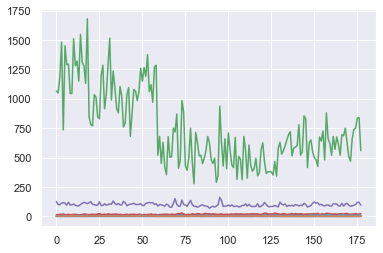

In [9]:
plt.plot(wine.data)

In [10]:
#Splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target, random_state=0)

#Testing the training and test dataset shape
print(X_train.shape)
print(X_test.shape)

(133, 13)
(45, 13)


In [11]:
#Using LogisticRegression to make classifiaction
logreg = LogisticRegression()

#Training the models 
logreg.fit(X_train, Y_train)

#Outputting predictions score
logreg.score(X_test, Y_test)

C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

In [13]:
#Normalizing the datasets to make new predictions
scaler = MinMaxScaler()

#Transforming the X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Testing X_train_scaled shape
X_train_scaled.shape

(133, 13)

In [14]:
#Retraining the model with the scaled data
logreg.fit(X_train_scaled, Y_train)

#Outputting prediction score
logreg.score(X_test_scaled, Y_test)

0.9777777777777777

In [15]:
#Scaling the dataset with the Standard Scaler
scaller = StandardScaler()

#Training the scaler 
scaler.fit(X_train, Y_train)

#Transforming the X-train, X-test datasets
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [19]:
#Retraining the model with scaled data
logreg.fit(X_train_scalled, Y_train)

#Displaying scores
logreg.score(X_test_scalled, Y_test)

#Testing the results with cross_val_score
cross = cross_val_score(logreg, wine.data, wine.target, cv=5)
print(cross)

C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.88888889 0.94444444 0.94444444 1.         1.        ]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No handles with labels found to put in legend.


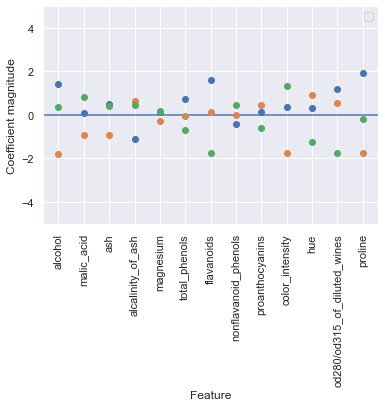

In [17]:
#Plotting Feature Importance for Logistic Regression Model
plt.plot(logreg.coef_.T, 'o')
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [20]:
#Making classification With Random Forest Classifier 
Rnd = RandomForestClassifier()

#Fitting the model with training dataset
Rnd.fit(X_train, Y_train)

#Outputting predictions Score
Rnd.score(X_test, Y_test)


0.9777777777777777

In [22]:
#Training the model with normalized data
Rnd.fit(X_train_scaled, Y_train)

#Predictions score
Rnd.score(X_test_scaled, Y_test)

0.9777777777777777

In [27]:
#Scaled data doesn't make a predictive difference when using sklearn.ensemble models

In [24]:
#Making Predictions with Linear Support Vector Classifier
Lsvc = LinearSVC()

#Training the model and making predictions
Lsvc.fit(X_train, Y_train)
Lsvc.score(X_test, Y_test)

C:\Users\charl\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9555555555555556

No handles with labels found to put in legend.


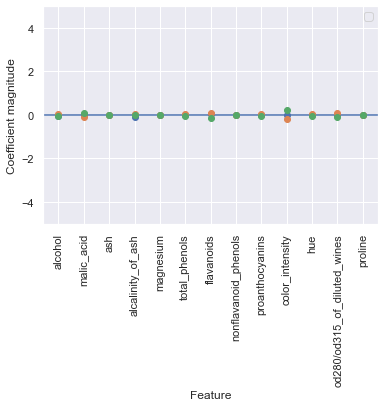

In [25]:
plt.plot(Lsvc.coef_.T, 'o')
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [28]:
#Making prediction using Decision Tree Classifier
DTC = DecisionTreeClassifier()

#Fitting the model to training datasets
DTC.fit(X_train, Y_train)

#Outputting Score for Predictions
DTC.score(X_test, Y_test)

0.9333333333333333

In [29]:
#Retraining the dataset with scaled data
DTC.fit(X_train_scaled, Y_train)

#Outputting scores
DTC.score(X_test_scaled, Y_test)


0.9111111111111111

In [31]:
#Scaling data decreased the score for Tree based classifier